# 1 Libraries

In the first section, We import all the libraries and functions that I will be using.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
# adaboost
from sklearn.ensemble import AdaBoostClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Importing Regressors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


# Importing Evaluation matrics

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# Importing tools for clustering
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# seed
RSEED = 10

# 2 Data Exploration and Visualization

In this section, We will be exploring and visualizing the data and its variables to get a better understanding of what is required in the pre-processing section.

The datasets includes different features of products, store  locations and weather stations.

### Variables:
__date__ - the day of sales or weather <br>
__store_nbr__ - an id representing one of the 45 stores <br>
__station_nbr__ - an id representing one of 20 weather stations <br>
__item_nbr__ - an id representing one of the 111 products <br>
__units__ - the quantity sold of an item on a given day <br>
__tmax__ - the __highest__ temperature (Degrees Fahrenheit) on a given day in given weather station <br>
__tmin__ - the __lowest__ temperature (Degrees Fahrenheit) on a given day in given weather station <br>
__tavg__ - the __average__ temperature (Degrees Fahrenheit) on a given day in given weather station <br>
__depart__ - the __departure__ from normal on a given day in a given weather station <br>
__dewpoint__ - the __average dew point__ on a given day in a given weather station <br>
__wetbulb__ - the __average wet bulb__ on a given day in a given weather station <br>
__heat__ -  Heating (season begins with July) <br>
__cool__ - Cooling (season begins with January)<br>
__sunrise__ - Sunrise time HHMM <br>
__sunset__ - Sunset time HHMM <br>
__codesum__ - Significant Weather Types: <br>
+FC TORNADO/WATERSPOUT <br>
FC FUNNEL CLOUD <br>
TS THUNDERSTORM <br>
GR HAIL <br>
RA RAIN <br>
DZ DRIZZLE <br>
SN SNOW <br>
SG SNOW GRAINS <br>
GS SMALL HAIL &/OR SNOW PELLETS <br>
PL ICE PELLETS <br>
IC ICE CRYSTALS <br>
FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY) <br>
FG FOG <br>
BR MIST <br>
UP UNKNOWN PRECIPITATION <br>
HZ HAZE <br>
FU SMOKE <br>
VA VOLCANIC ASH <br>
DU WIDESPREAD DUST <br>
DS DUSTSTORM <br>
PO SAND/DUST WHIRLS <br>
SA SAND <br>
SS SANDSTORM <br>
PY SPRAY <br>
SQ SQUALL <br>
DR LOW DRIFTING <br>
SH SHOWER <br>
FZ FREEZING <br>
MI SHALLOW <br>
PR PARTIAL <br>
BC PATCHES <br>
BL BLOWING <br>
VC VICINITY - LIGHT + HEAVY <br>
"NO SIGN" MODERATE <br>
__snowfall__ - Snow/Ice (on ground) T = Trace M = Missing data <br>
__preciptotal__ - Precipitation T = Trace M = Missing data <br>
__stnpressure__ - Average station pressure <br>
__sealevel__ - Average sea level pressure <br>
__resultspeed__ -  Resultant wind speed <br>
__resultdir__ -  Resultant wind direction <br>
__avgspeed__ - Average wind speed <br>

### File descriptions
__sales.csv__ - sales data for all stores & dates in the training set <br>
__key.csv__ - the relational mapping between stores and the weather stations that cover them <br>
__weather.csv__ - a file containing the NOAA weather information for each station and day <br>

In [2]:
#Import dataset
sales=pd.read_csv('sales.csv')
key=pd.read_csv('key.csv')
weather=pd.read_csv('weather.csv')

In [3]:
# look at 5 random observations 
display(sales.sample(5, random_state=RSEED))

,date,store_nbr,item_nbr,units
4355096,2014-08-27,7,12,0
1062171,2012-08-04,2,13,0
3576478,2014-02-17,44,59,0
1702174,2012-12-10,7,101,0
1765952,2012-12-22,42,54,0


In [4]:
display(key.sample(5, random_state=RSEED))

,store_nbr,station_nbr
30,31,17
10,11,10
20,21,3
33,34,17
34,35,5


In [5]:
display(weather.sample(10, random_state=RSEED))

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7069,2,2012-12-27,33,27,30,4,30,31,35,0,0715,1622,RA FZRA SN BR UP,3.0,0.91,28.40,29.49,13.9,01,18.1
19202,6,2014-08-27,97,71,84,1,66,72,0,19,0605,1900,,0.0,0.00,29.44,29.94,3.8,10,4.8
9124,17,2013-04-08,76,63,70,M,58,62,0,5,-,-,BR,0.0,0.00,29.01,29.70,10.8,16,10.9
6520,13,2012-11-29,62,27,45,M,16,34,20,0,-,-,,M,0.00,24.24,30.01,2.3,19,5.8
115,2,2012-01-07,56,37,47,23,29,38,18,0,0716,1631,,0.0,0.00,28.63,29.75,8.9,26,9.6
3906,19,2012-07-21,87,67,77,4,62,68,0,12,0431,1925,,0.0,0.00,29.30,30.04,7.5,24,7.8
2762,9,2012-05-25,70,52,61,M,50,56,4,0,-,-,,M,T,29.26,29.97,3.2,28,4.3
10541,14,2013-06-18,87,69,78,0,65,69,0,13,0515,1948,,0.0,0.00,28.62,29.96,3.7,09,6.3
14269,13,2013-12-23,47,16,32,M,16,25,33,0,-,-,SN BR,M,T,24.33,30.27,1.9,18,4.8
2271,12,2012-04-29,85,62,74,M,65,68,0,9,-,-,FG+ BR,0.0,0.00,30.07,30.12,3.6,12,4.2


In [6]:
# data shape (rows, columns)
sales.shape

(4617600, 4)

In [7]:
key.shape

(45, 2)

In [8]:
weather.shape

(20517, 20)

In [9]:
# display descriptive statistics for numeric variables
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sales.describe()

,store_nbr,item_nbr,units
count,4617600.00,4617600.00,4617600.00
mean,23.09,56.00,0.99
std,12.95,32.04,9.88
min,1.00,1.00,0.00
25%,12.00,28.00,0.00
50%,23.00,56.00,0.00
75%,34.00,84.00,0.00
max,45.00,111.00,5568.00


In [10]:
key.describe()

,store_nbr,station_nbr
count,45.00,45.00
mean,23.00,11.27
std,13.13,5.02
min,1.00,1.00
25%,12.00,7.00
50%,23.00,12.00
75%,34.00,15.00
max,45.00,20.00


In [11]:
weather.describe()

,station_nbr
count,20517.00
mean,10.55
std,5.77
min,1.00
25%,6.00
50%,11.00
75%,16.00
max,20.00


In [12]:
# variables data types
sales.dtypes

date         object
store_nbr     int64
item_nbr      int64
units         int64
dtype: object

In [13]:
key.dtypes

store_nbr      int64
station_nbr    int64
dtype: object

In [14]:
weather.dtypes

station_nbr     int64
date           object
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
dtype: object

In [15]:
# clean the rows with zero unit sales
sales=sales[sales['units']!=0]

In [16]:
sales.shape

(118696, 4)

In [17]:
# merge sales & key datasets
df=pd.merge(sales, key, on='store_nbr', how='inner')

Text(0.5, 1.0, 'Number Of units Per Product')

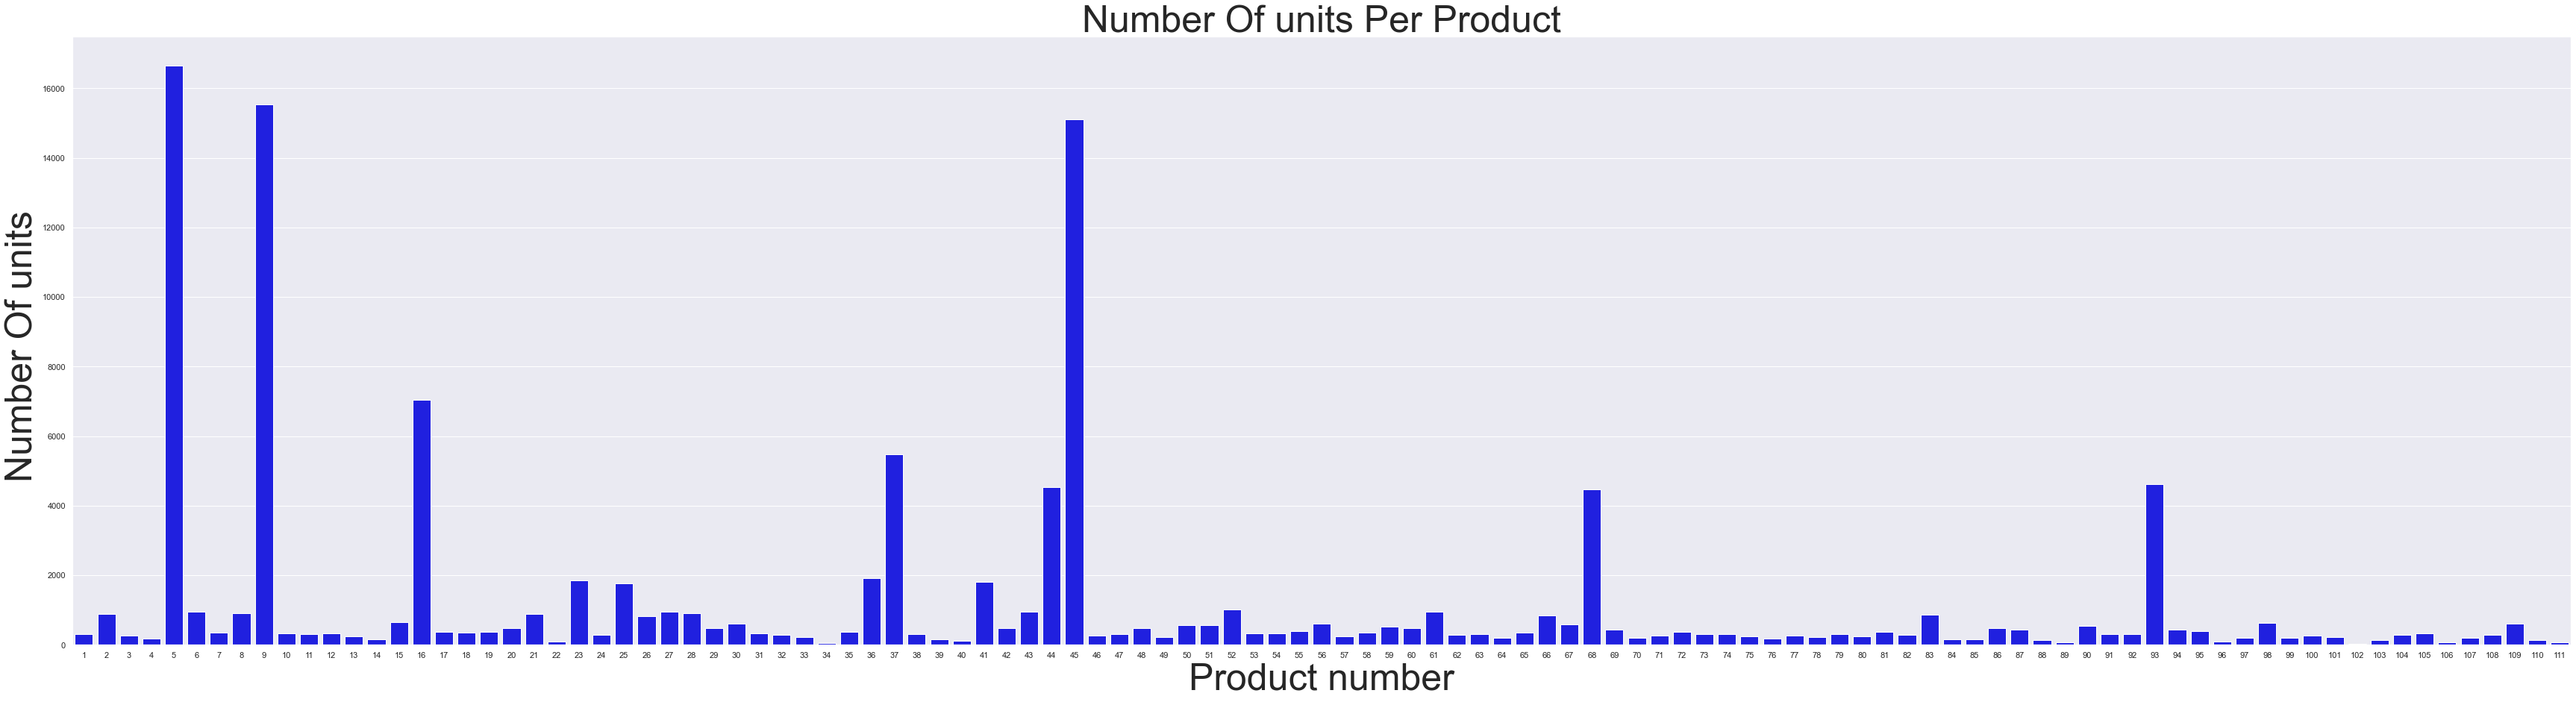

In [18]:
new_df=df.drop(['store_nbr','date','station_nbr'], axis=1,)
ax = sns.set(rc={"figure.figsize":(60, 15)})
ax = sns.countplot(data=new_df, x='item_nbr', color='blue')
ax.set_xlabel('Product number', fontsize=50)
ax.set_ylabel('Number Of units ', fontsize=50)
ax.set_title('Number Of units Per Product', fontsize=50)

The bars above show that items no. 5, 9, 45 are very popular with more than 15,000 units sales. Items no. 16, 37, 44, 68 93 are also have more than 4,000 units sales.

Text(0.5, 1.0, 'Number Of Transactions Per Store')

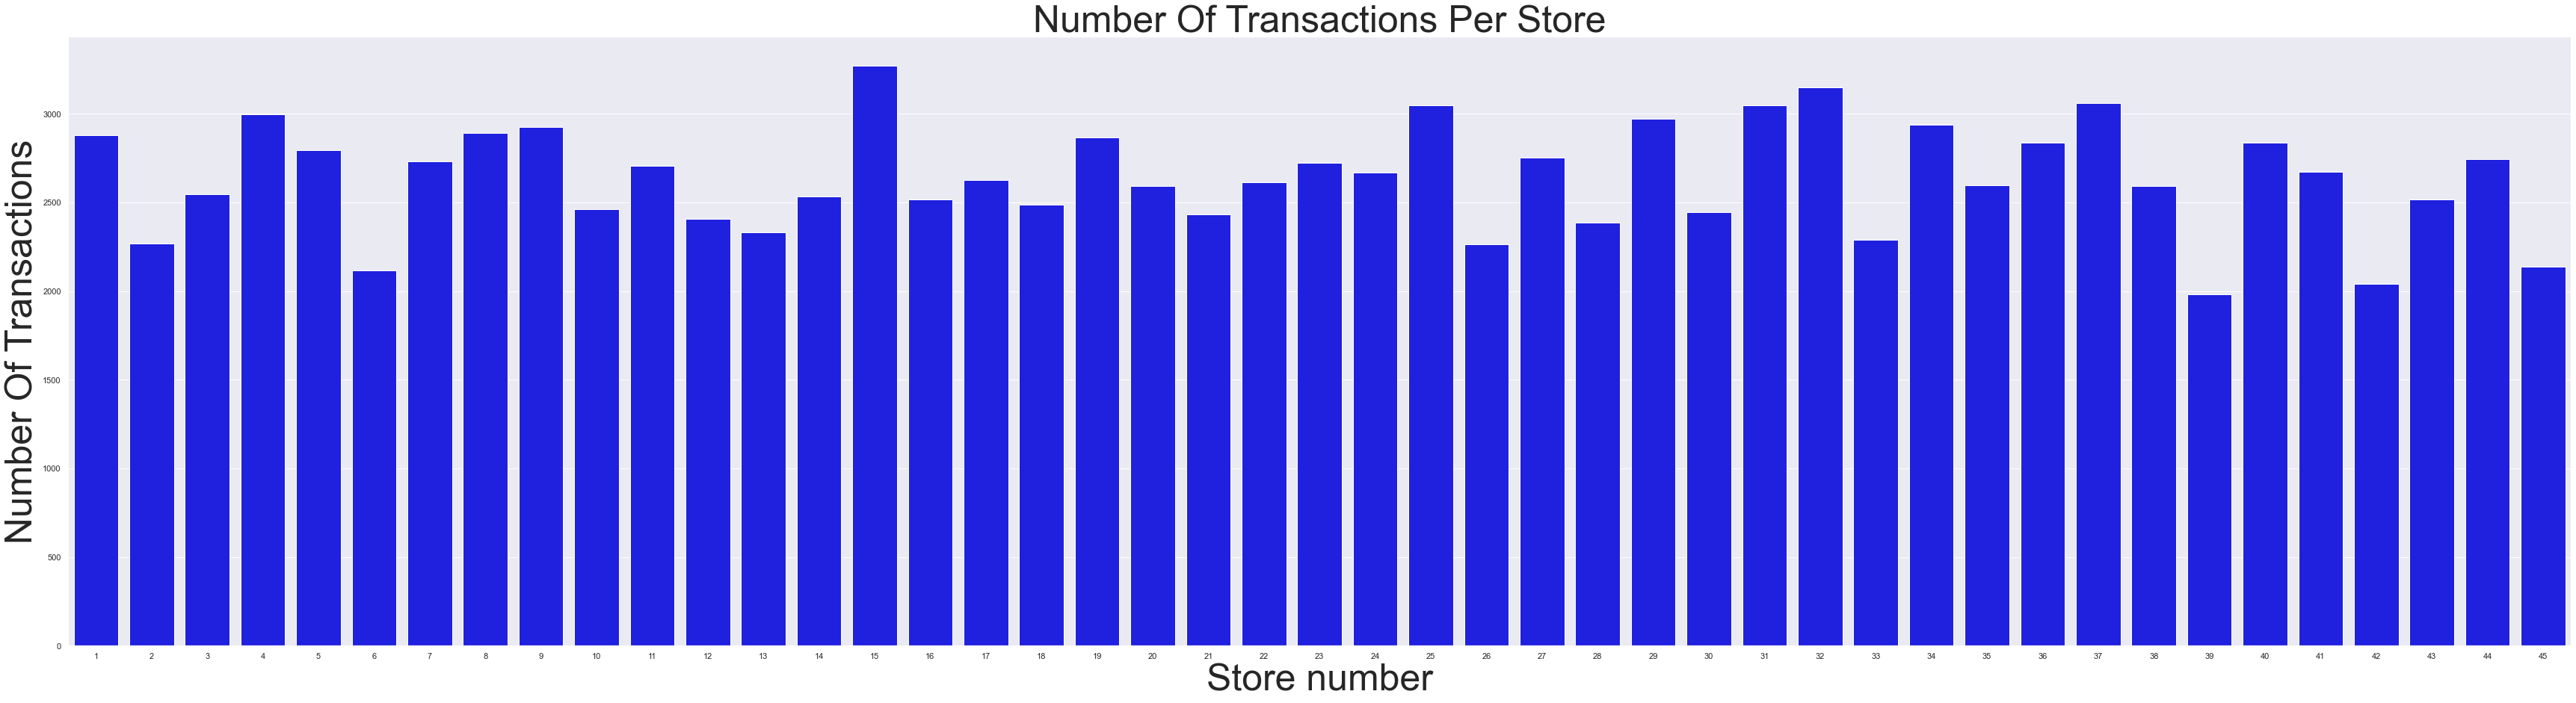

In [19]:
new_df=df.drop(['item_nbr','date','station_nbr'], axis=1,)
ax = sns.set(rc={"figure.figsize":(60, 15)})
ax = sns.countplot(data=new_df, x='store_nbr', color='blue')
ax.set_xlabel('Store number', fontsize=50)
ax.set_ylabel('Number Of Transactions', fontsize=50)
ax.set_title('Number Of Transactions Per Store', fontsize=50)

The bars above show that most of the stores are around 2,500 transactions.

Text(0.5, 1.0, 'Number Of Transactions Per Weather Station')

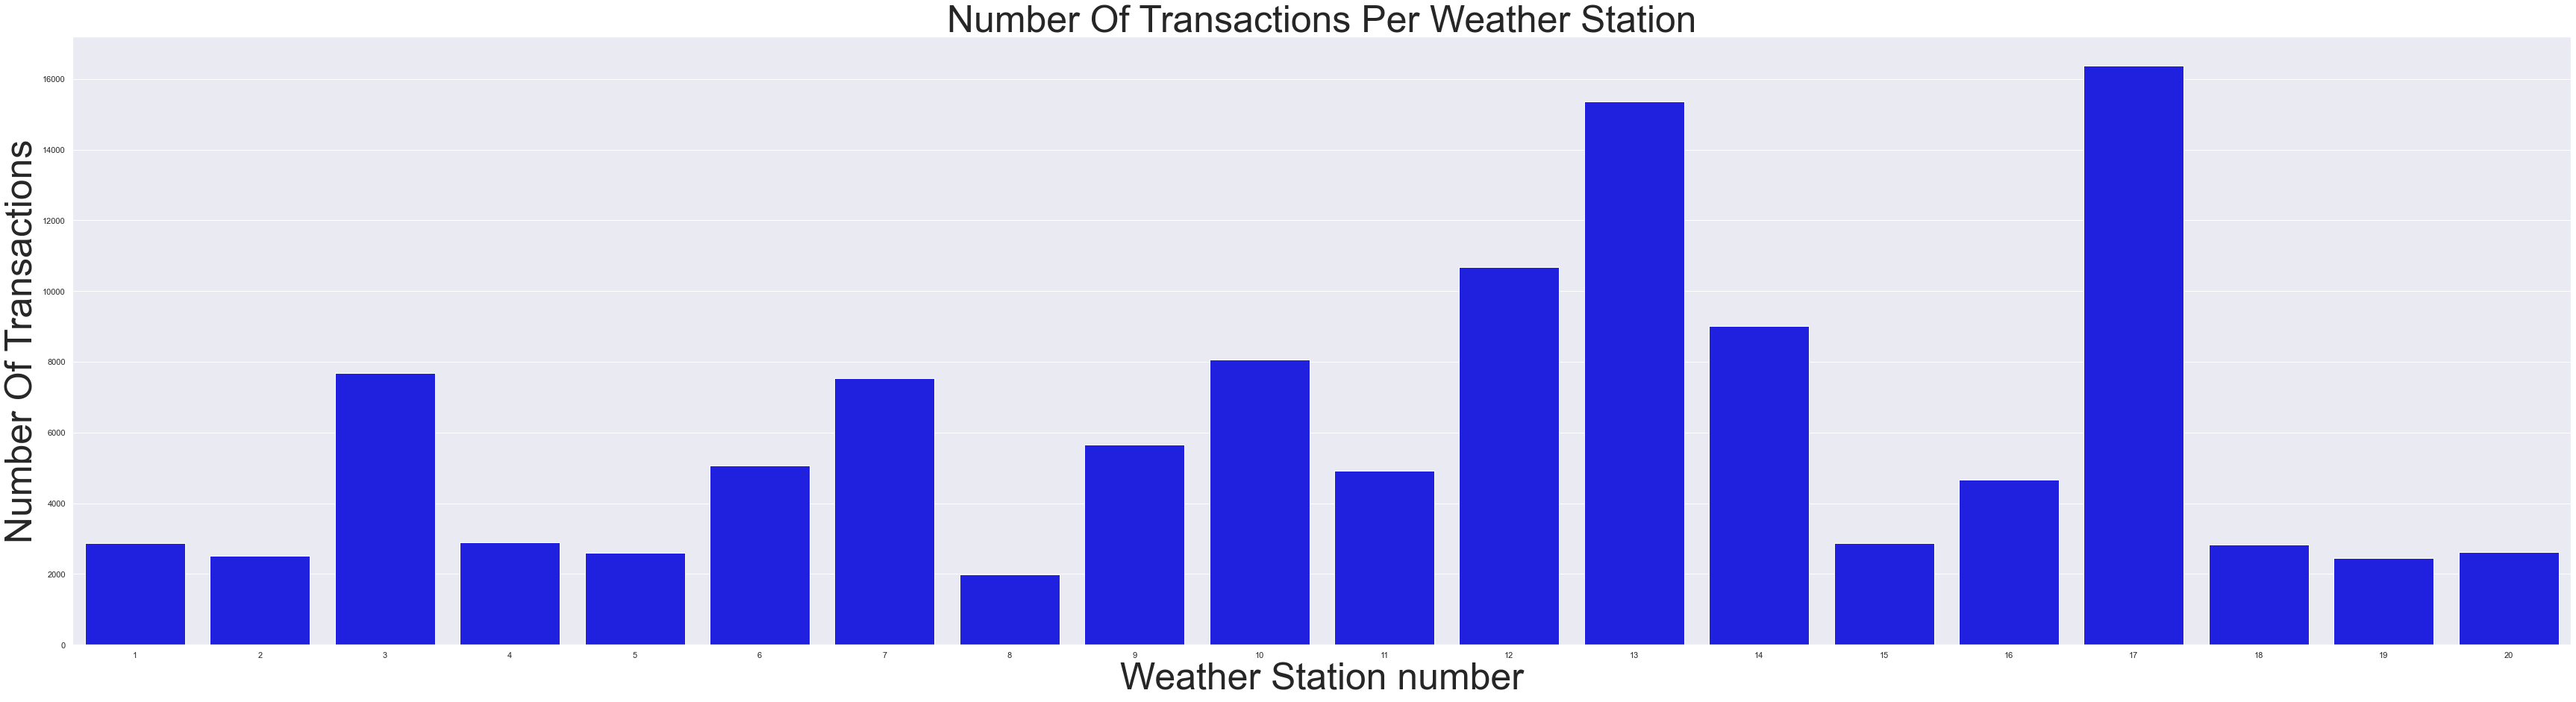

In [20]:
new_df=df.drop(['item_nbr','date','store_nbr'], axis=1,)
ax = sns.set(rc={"figure.figsize":(60, 15)})
ax = sns.countplot(data=new_df, x='station_nbr', color='blue')
ax.set_xlabel('Weather Station number', fontsize=50)
ax.set_ylabel('Number Of Transactions', fontsize=50)
ax.set_title('Number Of Transactions Per Weather Station', fontsize=50)

The bars above show that station no. 13 & 17 are the most popular with more than 14,000 transactions.

In [21]:
# find the 10th largest transactions 
df.nlargest(10, ['units'])

,date,store_nbr,item_nbr,units,station_nbr
94290,2012-11-15,37,5,5568,13
95390,2013-11-21,37,5,3369,13
40692,2012-10-28,16,25,577,2
44371,2013-12-08,17,9,503,20
86100,2012-08-05,33,9,476,3
86182,2012-09-01,33,44,469,3
43914,2013-04-09,17,9,460,20
86088,2012-08-01,33,44,460,3
86550,2013-02-01,33,44,448,3
85695,2012-04-01,33,44,441,3


Apparently, on store no.37 itme no. 5 had typo mistake. Probably on 2012-11-15 and 2013-11-21 there were 568, 369 Respectively.

# 3 Data Pre-Processing

In this section, We apply several pre-processing methods to the data in order to prepare it for the models that we wish to apply in the next section.

We drop the variables below because they are irrelevant for sales.

In [22]:
df1 = weather.copy()

In [23]:
# drop irrelevant variables
df1.drop(['sunrise','sunset','cool','heat'], axis=1, inplace=True)

Now we need to work with "codesum" that describes summary of the weather.

Note: FG+ will give 1 to FG and also to the FG+ column

In [24]:
codesum_columns = set(' '.join(set(df1["codesum"])).strip().split())
codesum = pd.DataFrame(index=df1.index, columns=codesum_columns)

for column in codesum.columns:
    for i in range(len(df1.index)):
        if column in df1["codesum"][i]:
            codesum[column][i] = 1
            
df1 = df1.drop("codesum", 1)
df1 = df1.join(codesum.fillna(0))

### Imputation

We replaced missing values to null in order to find them.

In [25]:
df1 = df1.replace(["-",""," ","M"], np.NaN)

In [26]:
set(weather["snowfall"])

{'  T',
 '0.0',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1.0',
 '1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '10.5',
 '11.0',
 '12.2',
 '13.1',
 '13.5',
 '14.9',
 '15.2',
 '16.2',
 '2.0',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '2.9',
 '3.0',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '4.0',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.6',
 '4.7',
 '4.9',
 '5.0',
 '5.1',
 '5.2',
 '5.4',
 '5.5',
 '5.7',
 '5.8',
 '6.1',
 '6.2',
 '6.4',
 '6.6',
 '6.7',
 '7.0',
 '7.1',
 '7.2',
 '7.7',
 '7.8',
 '8.0',
 '9.3',
 'M'}

In [27]:
set(weather["preciptotal"])

{'  T',
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.15',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.25',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.38',
 '0.39',
 '0.40',
 '0.41',
 '0.42',
 '0.43',
 '0.44',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.49',
 '0.50',
 '0.51',
 '0.52',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.57',
 '0.58',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.65',
 '0.66',
 '0.67',
 '0.68',
 '0.69',
 '0.70',
 '0.71',
 '0.72',
 '0.73',
 '0.74',
 '0.75',
 '0.76',
 '0.77',
 '0.78',
 '0.79',
 '0.80',
 '0.81',
 '0.82',
 '0.83',
 '0.84',
 '0.85',
 '0.86',
 '0.87',
 '0.88',
 '0.89',
 '0.90',
 '0.91',
 '0.92',
 '0.93',
 '0.94',
 '0.95',
 '0.96',
 '0.97',
 '0.98',
 '0.99',
 '1.00',
 '1.01',
 '1.02',
 '1.03',
 '1.04',
 '1.05',
 '1.06',
 '1.07',
 '1.08',
 '1.09',
 '

As we see that the min value for snowing & percipitation without 0 is 0.01, we will assume that T is 0.001

In [28]:
# replace values with 'T' to very small values
df1=df1.replace(["T", "  T"], 0.001)

In [29]:
# missing values by variable
df1.isnull().sum()

station_nbr        0
date               0
tmax             906
tmin             908
tavg            1469
depart         11511
dewpoint         666
wetbulb         1252
snowfall        7224
preciptotal      860
stnpressure      929
sealevel        1724
resultspeed      589
resultdir        589
avgspeed         875
TSRA               0
MIFG               0
PRFG               0
DZ                 0
BCFG               0
BLDU               0
BR                 0
FG+                0
DU                 0
UP                 0
FZDZ               0
TS                 0
HZ                 0
FU                 0
PL                 0
SG                 0
VCFG               0
BLSN               0
FZRA               0
GR                 0
TSSN               0
VCTS               0
SQ                 0
RA                 0
FG                 0
FZFG               0
SN                 0
GS                 0
dtype: int64

In [30]:
# before dropping observations
df1.shape

(20517, 43)

We've decided to drop any observations that have less than half of the numerical features because filling in the missing values in this case could cause innacurate results.

In [31]:
# drop observations that don't have at least 10 features
df1.dropna(thresh=38, axis=0, inplace=True)

In [32]:
# after dropping observations
df1.shape

(19554, 43)

In [33]:
# missing values by variable
df1.isnull().sum()

station_nbr        0
date               0
tmax               4
tmin               3
tavg             543
depart         10556
dewpoint         109
wetbulb          308
snowfall        6307
preciptotal        4
stnpressure       57
sealevel        1157
resultspeed       81
resultdir         81
avgspeed           8
TSRA               0
MIFG               0
PRFG               0
DZ                 0
BCFG               0
BLDU               0
BR                 0
FG+                0
DU                 0
UP                 0
FZDZ               0
TS                 0
HZ                 0
FU                 0
PL                 0
SG                 0
VCFG               0
BLSN               0
FZRA               0
GR                 0
TSSN               0
VCTS               0
SQ                 0
RA                 0
FG                 0
FZFG               0
SN                 0
GS                 0
dtype: int64

In [34]:
# change data types to float of numerical features 
df1['tmax'] = df1['tmax'].astype('float64')
df1['tmin'] = df1['tmin'].astype('float64')
df1['tavg'] = df1['tavg'].astype('float64')
df1['depart'] = df1['depart'].astype('float64')
df1['dewpoint'] = df1['dewpoint'].astype('float64')
df1['wetbulb'] = df1['wetbulb'].astype('float64')
df1['snowfall'] = df1['snowfall'].astype('float64')
df1['preciptotal'] = df1['preciptotal'].astype('float64')
df1['stnpressure'] = df1['stnpressure'].astype('float64')
df1['sealevel'] = df1['sealevel'].astype('float64')
df1['resultspeed'] = df1['resultspeed'].astype('float64')
df1['resultdir'] = df1['resultdir'].astype('float64')
df1['avgspeed'] = df1['avgspeed'].astype('float64')

In [35]:
display(df1.sample(10, random_state=RSEED))

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,snowfall,preciptotal,...,FZRA,GR,TSSN,VCTS,SQ,RA,FG,FZFG,SN,GS
17096,20,2014-05-13,70.00,55.00,63.00,nan,48.00,55.00,0.00,0.18,...,0,0,0,0,0,1,0,0,0,0
10936,9,2013-07-08,86.00,65.00,76.00,nan,66.00,70.00,nan,0.00,...,0,0,0,0,0,0,0,0,0,0
11732,2,2013-08-18,75.00,59.00,67.00,-1.00,57.00,61.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
10115,8,2013-05-28,92.00,73.00,83.00,nan,72.00,75.00,nan,0.00,...,0,0,0,0,0,0,0,0,0,0
10014,7,2013-05-23,79.00,60.00,70.00,nan,58.00,61.00,0.00,2.92,...,0,0,0,1,0,1,1,0,0,0
12695,19,2013-10-05,71.00,62.00,67.00,11.00,64.00,65.00,0.00,1.19,...,0,0,0,0,0,1,1,0,0,0
8740,13,2013-03-20,60.00,20.00,40.00,nan,17.00,30.00,nan,0.00,...,0,0,0,0,0,0,0,0,0,0
2201,18,2012-04-25,89.00,66.00,78.00,9.00,62.00,68.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
13433,17,2013-11-11,73.00,44.00,59.00,nan,48.00,52.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
12703,7,2013-10-06,70.00,46.00,58.00,nan,33.00,46.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df1.dtypes

station_nbr      int64
date            object
tmax           float64
tmin           float64
tavg           float64
depart         float64
dewpoint       float64
wetbulb        float64
snowfall       float64
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir      float64
avgspeed       float64
TSRA             int64
MIFG             int64
PRFG             int64
DZ               int64
BCFG             int64
BLDU             int64
BR               int64
FG+              int64
DU               int64
UP               int64
FZDZ             int64
TS               int64
HZ               int64
FU               int64
PL               int64
SG               int64
VCFG             int64
BLSN             int64
FZRA             int64
GR               int64
TSSN             int64
VCTS             int64
SQ               int64
RA               int64
FG               int64
FZFG             int64
SN               int64
GS               int64
dtype: obje

As we wish to use KNN for imputing the last missing values, we will first create dummy variables for the features.

Next, We create two seperate datasets: one for numeric and one for categorical features (which will later be merged back together).

In [37]:
# create different datasets for numeric variables
numeric_features = df1.select_dtypes(include=['float64'])

In [38]:
# fill the missing data with KNN
imputer = KNNImputer(n_neighbors = 3, weights = 'distance')
imputed = imputer.fit_transform(numeric_features)
numeric_features[numeric_features.columns] =imputed 

In [39]:
# every value between 0 to 0.001 we will act its like T (very small amount)
numeric_features.loc[(numeric_features['preciptotal'] > 0) & (numeric_features['preciptotal'] < 0.001),'preciptotal'] = 0.001
numeric_features.loc[(numeric_features['snowfall'] > 0) & (numeric_features['snowfall'] < 0.001),'snowfall'] = 0.001

In [40]:
# drop numeric variables
df1.drop(numeric_features.columns, axis=1, inplace=True)

In [41]:
# add new numeric variables to the dataframe
df1 = pd.concat([df1, numeric_features], axis=1)

We will check if there are any missing values in the dataframe

In [42]:
df1.isnull().sum()

station_nbr    0
date           0
TSRA           0
MIFG           0
PRFG           0
DZ             0
BCFG           0
BLDU           0
BR             0
FG+            0
DU             0
UP             0
FZDZ           0
TS             0
HZ             0
FU             0
PL             0
SG             0
VCFG           0
BLSN           0
FZRA           0
GR             0
TSSN           0
VCTS           0
SQ             0
RA             0
FG             0
FZFG           0
SN             0
GS             0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

# 4 Unit Sales Prediction

In this section, We predict the daily sales figures of key_sum per store on a given day using the weather and sales data.

In [43]:
stnm = df.copy()

Summing up the number of units sales of items 5,6,9,16,45 to a new column named key_sum

In [44]:
stnm = stnm[stnm["item_nbr"].isin([5,6,9,16,45])]
units_sum = pd.DataFrame(stnm.groupby(["date", "store_nbr"])["units"].sum().rename("key_sum"))
units_sum.reset_index(inplace=True)

Merging the key_sum column back to sales data farme, placing 0 in key_sum to rest items

In [45]:
key = stnm.merge(units_sum)
key.loc[~key["item_nbr"].isin([5,6,9,16,45]), "key_sum"]  = 0

In [46]:
key_sum = key.copy()

Making store and item be a categorical feature

In [47]:
key_sum['store_nbr'] = pd.Categorical(key_sum.store_nbr)
key_sum['item_nbr'] = pd.Categorical(key_sum.item_nbr)

categorical_features = key_sum.select_dtypes(include='category')

# get categorical variables after dropping observations
categorical_features = key_sum[categorical_features.columns]

# one-hot encoding
encoded = pd.get_dummies(categorical_features, drop_first=False)

# drop categorical variables
key_sum.drop(categorical_features.columns, axis=1, inplace=True)

# add new encoded variables to the dataframe
key_sum = pd.concat([key_sum, encoded], axis=1)

In [48]:
key_sum

,date,units,station_nbr,key_sum,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,...,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,item_nbr_5,item_nbr_6,item_nbr_9,item_nbr_16,item_nbr_45
0,2012-01-01,29,1,29,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2012-01-02,60,1,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2012-01-03,15,1,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012-01-04,20,1,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012-01-05,16,1,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55296,2014-10-27,17,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55297,2014-10-28,11,5,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55298,2014-10-29,20,5,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55299,2014-10-30,16,5,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
#Removing the features as we were asked in the task
key_sum = key_sum.drop(['item_nbr_5', 'item_nbr_6','item_nbr_9','item_nbr_16','item_nbr_45','units'], axis = 1)

In [50]:
#Removing all unnecessary fields. Working only with fields that key_sum greather that 0
key_sum_filtered = key_sum[key_sum['key_sum'] > 0]

In [51]:
key_sum_filtered

,date,station_nbr,key_sum,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,...,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45
0,2012-01-01,1,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-02,1,60,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-03,1,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-04,1,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,1,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55296,2014-10-27,5,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55297,2014-10-28,5,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55298,2014-10-29,5,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55299,2014-10-30,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Merging sales and weather together
sales_by_weather = key_sum_filtered.merge(df1, on=["date", "station_nbr"])

In [53]:
#Creating new format for Date by day month and year
sales_by_weather['Year'] = sales_by_weather['date'].apply(lambda x : x[0:4]) 
sales_by_weather['Month'] = sales_by_weather['date'].apply(lambda x : x[5:7]) 
sales_by_weather['Day'] = sales_by_weather['date'].apply(lambda x : x[8:])
sales_by_weather = sales_by_weather.drop(['date'], axis = 1)

In [54]:
#Dividing test and train by years as it asks in a task
train = sales_by_weather[sales_by_weather["Year"] < "2014"]
test = sales_by_weather[sales_by_weather["Year"] == "2014"]

In [55]:
#Predicting the key_sum
X_train = train.drop(["key_sum"], axis=1)
y_train = train.key_sum

X_test = test.drop(["key_sum"], axis=1)
y_test = test.key_sum

Defining the models with hyper-parameters for parameter tunning

In [56]:
# check the performance on diffrent regressors
models = []

models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('LinearRegression', LinearRegression()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))

parameters_grid_forest = {
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 4],
    'n_estimators': [20, 50]
}

parameters_grid_trees = {
    'max_depth': [2,5],
    'min_samples_leaf': [2,5,8,10]
}

parameters_grid_linear = {    
    'normalize': [True],
    'copy_X' :[True],
    'fit_intercept' : [True]
}

parameters_grid_ada = {
    'n_estimators': [10,30],
    'random_state' : [1,2,3]
}

Training and predicting by the model

In [57]:

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
model_l = []

#grid_search = GridSearchCV(estimator=models, cv=10)
import time
i = 0
for name,model in models:
    if (name == "RandomForestRegressor" ):
      pg = parameters_grid_forest
    elif (name == "DecisionTreeRegressor"):
      pg = parameters_grid_trees
    elif (name == "LinearRegression"):
      pg = parameters_grid_linear
    else:
      pg = parameters_grid_ada
    i = i+1
    start_time = time.time()
    grid_search = GridSearchCV(estimator=model, param_grid=pg, cv=10)
    # Fitting model to the Training set
    clf = model
    grid_search.fit(X_train, y_train)
    best = grid_search.best_estimator_
    
    # Scores of model
    train = grid_search.score(X_train, y_train)
    test = grid_search.score(X_test, y_test)
    model_l.append(name)
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = best.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)

    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
#comp = pd.DataFrame({"Model" : model_l ,"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp = pd.DataFrame({"Name of Regressor" : model_l,"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

+ ==================================================================================================== +
			1-For RandomForestRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  45.17697402490915
--------------------------------------------------
Mean absolute error (MAE) :  35.439527500539505
--------------------------------------------------
R2 score :  0.21942097164658914
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (RandomForestRegressor) : 411.822 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For DecisionTreeRegressor The Performance result is: 
+ =========================================================================

,Name of Regressor,Training Score,Testing Score,MAE,RMSE,R2 Score
0,RandomForestRegressor,0.30,0.22,35.44,45.18,0.22
1,DecisionTreeRegressor,0.32,0.23,35.21,44.88,0.23
2,LinearRegression,0.44,0.55,25.13,34.16,0.55
3,AdaBoostRegressor,0.52,0.11,38.49,48.13,0.11


# 5 Rainy Day Prediction

In this section, based on the sales data table, we use two different machine learning models to predict if on a given day it rained or not for store number 11.

In [58]:
# merge the datasets 
store11_sales = pd.merge(df, df1, on=['date','station_nbr'], how='inner')

In [59]:
# filter to store no. 11
store11_sales = store11_sales.loc[store11_sales['store_nbr']==11]

In [60]:
# create new dataframe with relevant columns and new columns (year, month & day)
store11_sales_rain = pd.DataFrame()
store11_sales_rain['date'] = store11_sales['date']
store11_sales_rain['item_nbr'] = store11_sales['item_nbr']
store11_sales_rain['units'] = store11_sales['units']
store11_sales_rain['year'] = pd.DatetimeIndex(store11_sales_rain['date']).year
store11_sales_rain['month'] = pd.DatetimeIndex(store11_sales_rain['date']).month
store11_sales_rain['day'] = pd.DatetimeIndex(store11_sales_rain['date']).day
store11_sales_rain['preciptotal'] = store11_sales['preciptotal']

In [61]:
# define a rainy day as a day in which the precipitation is bigger than zero
store11_sales_rain.loc[(store11_sales_rain['preciptotal']>0), 'preciptotal'] = 1
store11_sales_rain.loc[(store11_sales_rain['preciptotal']==0), 'preciptotal'] = 0
store11_sales_rain['preciptotal'] = store11_sales_rain['preciptotal'].astype('int64')

We will check which items are sold by store no.11:

In [62]:
store11_sales_rain['item_nbr'].unique()

array([  9,  68,  61,  86,  87, 110], dtype=int64)

Now, we will check which items are sold by store no.11 before 2014 (training data):

In [63]:
store11_sales_rain[store11_sales_rain['date']<'2014-01-01']['item_nbr'].unique()

array([ 9, 68, 61, 86, 87], dtype=int64)

We will create new columns with those items

In [64]:
# one-hot encoding
encoded = pd.get_dummies(store11_sales_rain['item_nbr'], prefix='item_nbr', drop_first=False)

# drop item no. 110 variables
del encoded['item_nbr_110']

# add preciptotal to the dataframe
store11_sales_rain = store11_sales_rain.join(encoded)
store11_sales_rain.drop(['date','item_nbr'], axis=1, inplace=True)
store11_sales_rain = store11_sales_rain.reindex(columns=['year','month','day','item_nbr_9','item_nbr_61','item_nbr_68','item_nbr_86','item_nbr_87','units','preciptotal'])
store11_sales_rain

,year,month,day,item_nbr_9,item_nbr_61,item_nbr_68,item_nbr_86,item_nbr_87,units,preciptotal
59625,2012,1,1,1,0,0,0,0,74,0
59626,2012,1,1,0,0,1,0,0,48,0
59633,2012,1,2,1,0,0,0,0,49,0
59634,2012,1,2,0,0,1,0,0,71,0
59640,2012,1,3,1,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...
67684,2014,10,30,0,0,0,0,0,13,1
67689,2014,10,31,1,0,0,0,0,4,0
67690,2014,10,31,0,0,1,0,0,20,0
67691,2014,10,31,0,0,0,0,1,3,0


In [65]:
# generating pairwise correlation
corr = store11_sales_rain.corr()
  
# Displaying dataframe as an heatmap
corr.style.background_gradient(cmap ='YlOrRd')

,year,month,day,item_nbr_9,item_nbr_61,item_nbr_68,item_nbr_86,item_nbr_87,units,preciptotal
year,1.000000,-0.118591,0.013149,-0.056849,-0.017056,-0.056925,-0.145489,0.052345,-0.236407,0.004163
month,-0.118591,1.000000,-0.009054,0.029243,-0.169641,0.027833,-0.016008,0.040167,0.023144,0.012047
day,0.013149,-0.009054,1.000000,-0.008089,-0.017044,-0.008900,0.037205,0.014030,-0.083616,-0.001362
item_nbr_9,-0.056849,0.029243,-0.008089,1.000000,-0.226936,-0.496542,-0.130781,-0.305632,0.344860,-0.013375
item_nbr_61,-0.017056,-0.169641,-0.017044,-0.226936,1.000000,-0.226747,-0.059721,-0.139568,-0.345710,0.015888
item_nbr_68,-0.056925,0.027833,-0.008900,-0.496542,-0.226747,1.000000,-0.130672,-0.305378,0.379156,-0.012601
item_nbr_86,-0.145489,-0.016008,0.037205,-0.130781,-0.059721,-0.130672,1.000000,-0.080431,-0.199582,0.063694
item_nbr_87,0.052345,0.040167,0.014030,-0.305632,-0.139568,-0.305378,-0.080431,1.000000,-0.459212,0.000276
units,-0.236407,0.023144,-0.083616,0.344860,-0.345710,0.379156,-0.199582,-0.459212,1.000000,-0.003705
preciptotal,0.004163,0.012047,-0.001362,-0.013375,0.015888,-0.012601,0.063694,0.000276,-0.003705,1.000000


from the heatmap above can be seen that there is no feature with high correlation to preciptotal

Now, we divide the data to train (2012-2013) and test (2014). 

In [66]:
data_cls_train = store11_sales_rain[store11_sales_rain['year']<2014]
data_cls_test = store11_sales_rain[store11_sales_rain['year']>=2014]
X_cls_train = data_cls_train.drop(['preciptotal'], axis=1)
X_cls_test = data_cls_test.drop(['preciptotal'], axis=1)
Y_cls_train = data_cls_train['preciptotal']
Y_cls_test = data_cls_test['preciptotal']

We create a Decision Tree Classifier include parameter tuning.

In [67]:
# define function to calculate metrics
def get_metrics(y_test, y_pred):
    
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # get confusion matrix
    mat = metrics.confusion_matrix(y_test, y_pred)
    true_neg, false_pos, false_neg, true_pos = mat.ravel()
    
    # calculate sensitivity and specificity
    sensitivity = round(true_pos / np.sum(actual_pos), 4)
    specificity = round(true_neg / np.sum(actual_neg), 4)
    
    return sensitivity, specificity

In [68]:
#creating a decision tree
decision_tree = DecisionTreeClassifier()
parameters_grid = {
    'max_depth': [2,3,5,8,10],
    'min_samples_leaf': [2,3,4,5]
}

# define grid search
grid_search = GridSearchCV(decision_tree, parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_cls_train, Y_cls_train)
# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(f'Optimal parameteres are:{grid_search.best_params_}')

# predict
y_pred = best.predict(X_cls_test)

# calculate metrics
decision_tree_accuracy = round(accuracy_score(Y_cls_test, y_pred), 4)
decision_tree_sensitivity, decision_tree_specificity = get_metrics(Y_cls_test, y_pred)

# display metrics
decision_tree_df = pd.DataFrame([decision_tree_accuracy, decision_tree_sensitivity, decision_tree_specificity]).T
decision_tree_df = decision_tree_df.rename(index={0: 'Decision Tree Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
decision_tree_df

Optimal parameteres are:{'max_depth': 3, 'min_samples_leaf': 2}


,Accuracy,Sensitivity,Specificity
Decision Tree Classifier,0.59,0.51,0.67


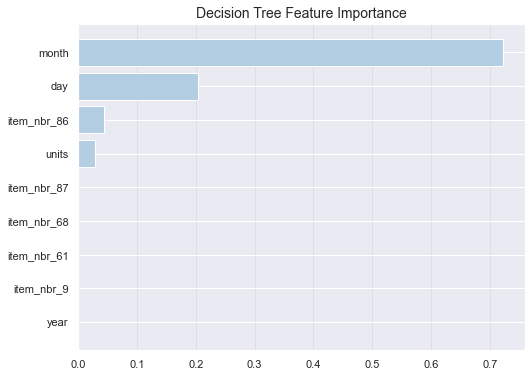

In [69]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_cls_train, Y_cls_train).feature_importances_, 
                   index=X_cls_train.columns, columns=['Importance']).sort_values('Importance')

# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Decision Tree Feature Importance', fontsize=14)
plt.show()

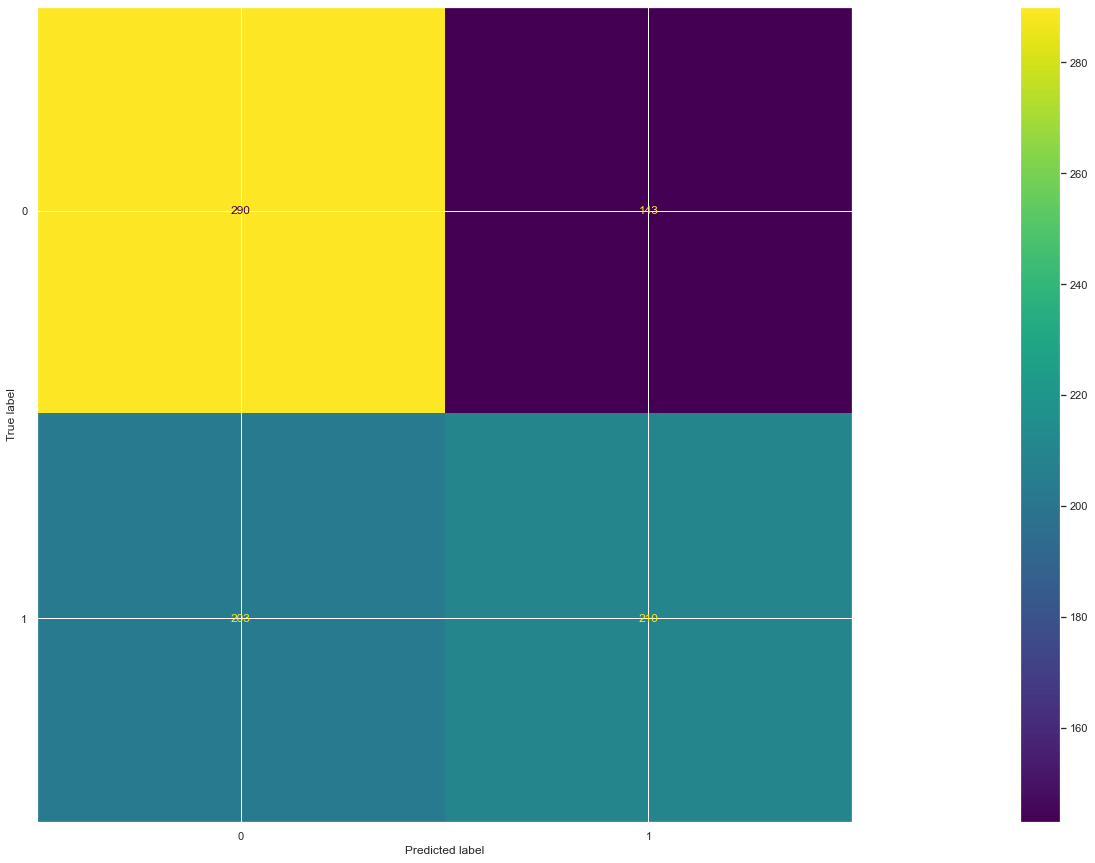

In [70]:
plot_confusion_matrix(best, X_cls_test, Y_cls_test)
plt.show()

We create a Random Forest Classifier include parameter tuning.

In [71]:
# define model
rf = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3, 5, 8, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 4, 6, 10],
    'n_estimators': [20, 50, 80]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_cls_train, Y_cls_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(f'Optimal parameteres are:{grid_search.best_params_}')

# predict
y_pred = best.predict(X_cls_test)

# calculate metrics
rf_accuracy  = round(accuracy_score(Y_cls_test, y_pred), 4)
rf_sensitivity, rf_specificity = get_metrics(Y_cls_test, y_pred)

# display metrics
rf_df = pd.DataFrame([rf_accuracy, rf_sensitivity, rf_specificity]).T
rf_df = rf_df.rename(index={0: 'Random Forest Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
rf_df

Optimal parameteres are:{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 80}


,Accuracy,Sensitivity,Specificity
Random Forest Classifier,0.57,0.54,0.59


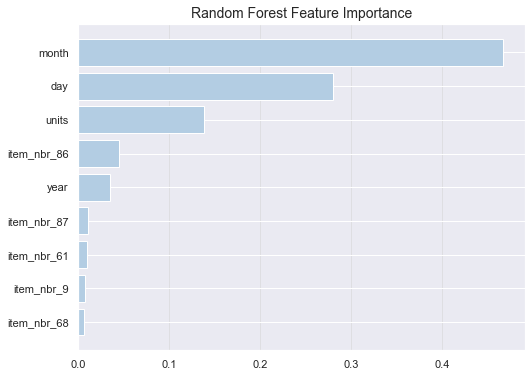

In [72]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_cls_train, Y_cls_train).feature_importances_, 
                   index=X_cls_train.columns, columns=['Importance']).sort_values('Importance')

# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.show()

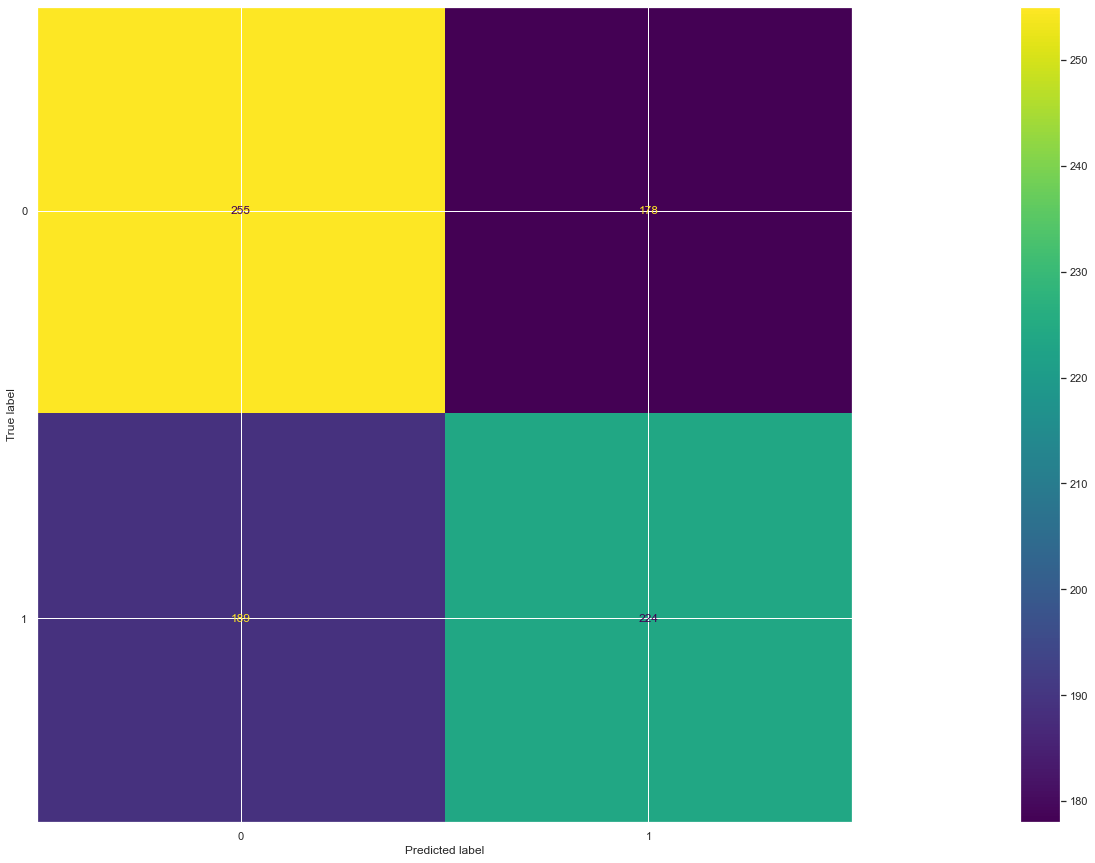

In [73]:
plot_confusion_matrix(best, X_cls_test, Y_cls_test)
plt.show()

We create a Adaboost Classifier.

In [74]:
#creating an adaboost
ada = AdaBoostClassifier()

parameters_grid = {
    'n_estimators': [2,10,20,50,100,200],
    'learning_rate': [0.2,0.5,0.7,1]
}

# define grid search
grid_search = GridSearchCV(ada, parameters_grid, cv=10)

# fit estimator
grid_search.fit(X_cls_train, Y_cls_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
print(f'Optimal parameteres are:{grid_search.best_params_}')

# predict
y_pred = best.predict(X_cls_test)

# calculate metrics
ada_accuracy = round(accuracy_score(Y_cls_test, y_pred), 3)
ada_sensitivity, ada_specificity = get_metrics(Y_cls_test, y_pred)

# display metrics
ada_df = pd.DataFrame([ada_accuracy, ada_sensitivity, ada_specificity]).T
ada_df = ada_df.rename(index={0: 'AdaBoost Classifier'}, columns={0: 'Accuracy', 1: 'Sensitivity', 2: 'Specificity'})
ada_df

Optimal parameteres are:{'learning_rate': 0.5, 'n_estimators': 2}


,Accuracy,Sensitivity,Specificity
AdaBoost Classifier,0.59,0.48,0.71


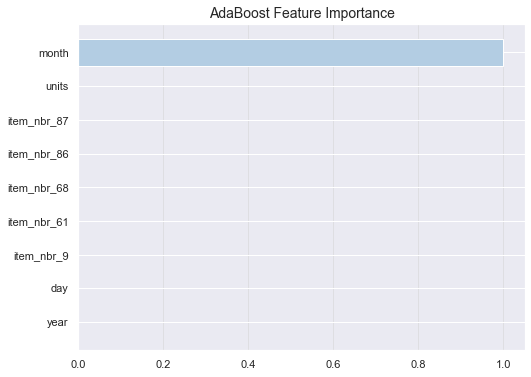

In [75]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_cls_train, Y_cls_train).feature_importances_, 
                   index=X_cls_train.columns, columns=['Importance']).sort_values('Importance')

# plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('AdaBoost Feature Importance', fontsize=14)
plt.show()

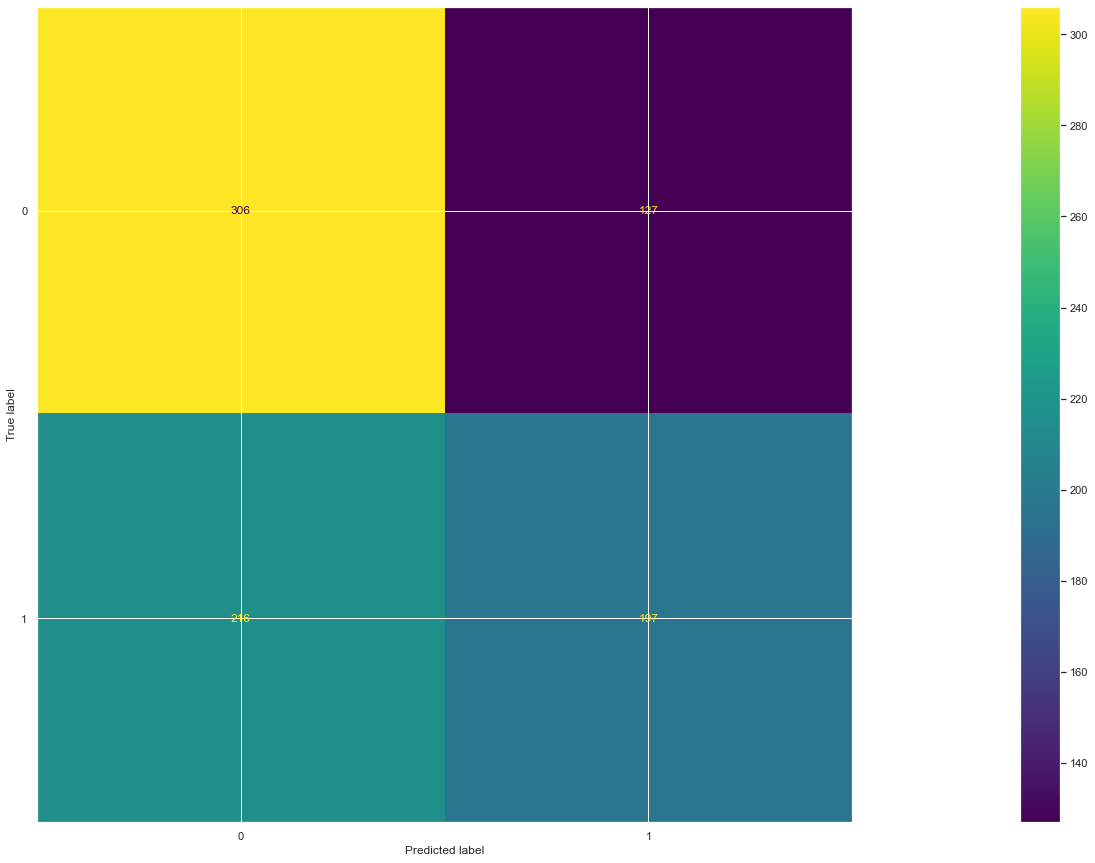

In [76]:
plot_confusion_matrix(best, X_cls_test, Y_cls_test)
plt.show()

# 6 Elevation Estimation (Bonus)

Due to the fact that weather conditions affect pressure and altitude calculations, the pressure and temperature at sea level must be known. The altitude at a given air pressure can be calculated using Equation below for an altitude up to 11 km (36,090 feet).

<br>
$$h = h_{b} + \frac{T_{b}}L_{b} \displaystyle \Bigg[{ (\frac{P}P_{b}) ^\frac{-RL_b}{g_0M} -1}{}\Bigg]_{}$$
&emsp;

#### where,

$P_{b}$ = static pressure (pressure at sea level) [Pa] <br>
$T_{b}$ = standard temperature (temperature at sea level) [K] <br>
$L_{b}$ = standard temperature lapse rate [K/m] = -0.0065 [K/m] <br>
$h$ = height about sea level [m]<br>
$h_{b}$ = height at the bottom of atmospheric layer [m]<br>
$R$ = universal gas constant = 8.31432 <br>
$g_{0}$ = gravitational acceleration constant = 9.80665<br>
$M$ = molar mass of Earth’s air = 0.0289644 [kg/mol]<br>


It can be also measured by international barometric formula:
h = 44330 * [ 1 - ( p / p0 ) ^ ( 1 / 5.255) ]

h = altitude (m)
p = measured pressure (Pa)
p0 = reference pressure at sea level.

In [77]:
df2 = df1.copy()

In [78]:
df2['Elevation'] = 44330 * (1- (df2['stnpressure']/df2['sealevel'])**(1/5.255))

In [79]:
df2

,station_nbr,date,TSRA,MIFG,PRFG,DZ,BCFG,BLDU,BR,FG+,...,dewpoint,wetbulb,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,Elevation
0,1,2012-01-01,0,0,0,0,0,0,1,0,...,36.00,40.00,0.00,0.05,29.78,29.92,3.60,20.00,4.60,39.55
1,2,2012-01-01,0,0,0,0,0,0,0,0,...,37.00,39.00,0.00,0.07,28.82,29.91,9.10,23.00,11.30,312.06
2,3,2012-01-01,0,0,0,0,0,0,0,0,...,24.00,36.00,0.00,0.00,29.77,30.47,9.90,31.00,10.00,195.63
3,4,2012-01-01,0,0,0,0,0,0,0,0,...,28.00,43.00,0.00,0.00,29.79,30.48,8.00,35.00,8.20,192.74
4,6,2012-01-01,0,0,0,0,0,0,0,0,...,31.00,43.00,0.00,0.00,29.95,30.47,14.00,36.00,13.80,144.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,16,2014-10-31,0,0,0,0,0,0,0,0,...,35.00,41.00,0.00,0.00,29.90,29.99,4.50,3.00,5.30,25.35
20513,17,2014-10-31,0,0,0,0,0,0,0,0,...,32.00,41.00,0.00,0.00,29.72,30.39,9.20,1.00,9.30,187.66
20514,18,2014-10-31,0,0,0,0,0,0,0,0,...,40.00,50.00,0.00,0.00,29.78,30.28,10.60,36.00,11.20,140.24
20515,19,2014-10-31,0,0,0,0,0,0,0,0,...,24.00,32.00,0.10,0.02,29.51,30.24,20.40,34.00,20.90,205.66


In [80]:
elev = df2.copy()

In [81]:
elev = elev.groupby("station_nbr").mean()

We can see that by the average station 13 has a highest elevations

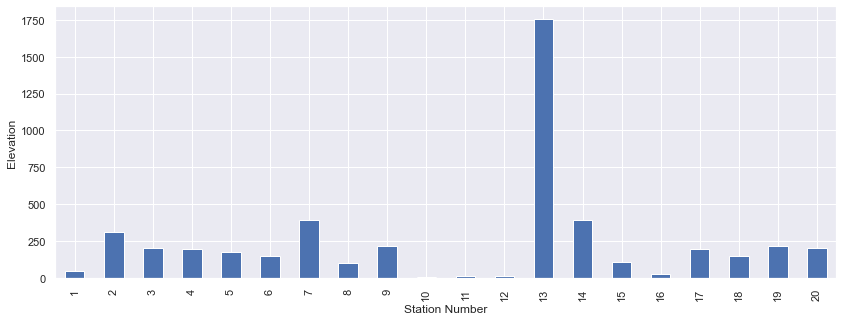

In [82]:
plt.figure(figsize=(14, 5))
elev.Elevation.plot(kind="bar")
plt.xlabel("Station Number")
plt.ylabel("Elevation")
plt.show()

# 7 Clustering (Bonus)

In [83]:
clust = df2.copy()

In [84]:
clust = clust.drop('date', axis=1)

Scaling the data by dimensions

In [85]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clust)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,...,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00,19554.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.69,-0.24,-0.05,-0.01,-0.16,-0.08,-0.03,-0.69,-0.21,-0.04,...,-3.70,-4.03,-0.11,-0.29,-4.37,-4.54,-1.54,-1.83,-2.01,-0.89
25%,-0.83,-0.24,-0.05,-0.01,-0.16,-0.08,-0.03,-0.69,-0.21,-0.04,...,-0.75,-0.69,-0.11,-0.29,-0.04,-0.63,-0.77,-0.59,-0.72,-0.53
50%,0.04,-0.24,-0.05,-0.01,-0.16,-0.08,-0.03,-0.69,-0.21,-0.04,...,0.23,0.18,-0.11,-0.29,0.20,-0.05,-0.19,-0.07,-0.15,-0.15
75%,0.90,-0.24,-0.05,-0.01,-0.16,-0.08,-0.03,1.45,-0.21,-0.04,...,0.85,0.83,-0.11,-0.26,0.49,0.60,0.58,0.76,0.56,-0.07
max,1.59,4.14,19.37,139.83,6.22,13.23,37.36,1.45,4.74,26.41,...,1.53,1.53,33.20,21.08,1.16,4.24,5.29,1.80,5.30,4.39


We have initialized five clusters, the initialization is not random here. We have used the k-means++ initialization which generally produces better results

In [86]:
# defining the kmeans function with initialization as k-means++
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=5)

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters

In [87]:
kmeans.inertia_

657228.4436504169

Text(0, 0.5, 'Inertia')

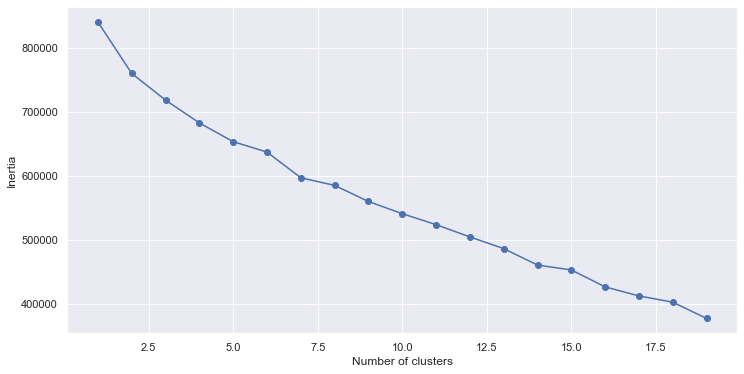

In [88]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [89]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

So, there are 9864 data points belonging to cluster 4 (index 3), then 6096 points in cluster 2 (index 1), and so on

In [90]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    10564
0     6200
1     1439
2      976
3      375
Name: cluster, dtype: int64

From 'elbow' graph its it's unlikely possible to choose preffered number of clusters